# Backpropagation
## Problem A

$V_{0,1} = x_{1}$ <br>
$V_{0,2} = x_{2}$ <br>
$V_{1,1} = σ (W_{0,1,1}*V_{0,1}+W_{0,1,2}*V_{0,2})$ <br>
$V_{1,2} = σ (W_{0,2,1}*V_{0,1}+W_{0,2,2}*V_{0,2})$ <br>
$V_{2,1} = W_{1,1,1}*V_{1,1} + W_{1,1,2}*V_{1,2}$ <br>
$N(x) = V_{2,1}$ <br> OR <br>
$N(x)=W_{1,1,1}*σ (W_{0,1,1}*x_{1}+W_{0,1,2}*x_{2}) + W_{1,1,2}*σ (W_{0,2,1}*x_{1}+W_{0,2,2}*x_{2})$

## Problem B

$l(N(·),(x, t)) = \frac{1}{2}(N(x) - t )^2$ <br>
$l(N(·),(x, t))= \frac{1}{2}( (W_{1,1,1}*σ (W_{0,1,1}*x_{1}+W_{0,1,2}*x_{2}) + W_{1,1,2}*σ (W_{0,2,1}*x_{1}+W_{0,2,2}*x_{2})) - t )^2$ <br><br>

$L(W_{0,1,1},W_{0,2,1},W_{0,1,2},W_{0,2,2},W_{1,1,1},W_{1,1,2}) = \frac{1}{N} \sum l(N(·),(x, t))$<br>
$L(W_{0,1,1},W_{0,2,1},W_{0,1,2},W_{0,2,2},W_{1,1,1},W_{1,1,2}) = \frac{1}{N} \sum \frac{1}{2}((W_{1,1,1}*σ (W_{0,1,1}*x_{1}+W_{0,1,2}*x_{2}) + W_{1,1,2}*σ (W_{0,2,1}*x_{1}+W_{0,2,2}*x_{2})) - t )^2$ 

## Problem C
#### $\frac{∂L}{∂o_{2,1}} = W_{1,1,1}*σ (W_{0,1,1}*x_{1}+W_{0,1,2}*x_{2}) + W_{1,1,2}*σ (W_{0,2,1}*x_{1}+W_{0,2,2}*x_{2})) - t$
#### $\frac{∂o_{2,1}}{∂w_{1,1,1}} = σ (W_{0,1,1}*x_{1}+W_{0,1,2}*x_{2})$
#### $\frac{∂L}{∂w_{1,1,1}} = \frac{∂L}{∂o_{2,1}}\frac{∂o_{2,1}}{∂w_{1,1,1}}$ <br>


#### $\frac{∂o_{2,1}}{∂w_{1,1,2}} = σ (W_{0,2,1}*x_{1}+W_{0,2,2}*x_{2})$
#### $\frac{∂L}{∂w_{1,1,2}} = \frac{∂L}{∂o_{2,1}}\frac{∂o_{2,1}}{∂w_{1,1,2}}$  <br>

#### $ \frac{∂o_{2,1}}{∂o_{1,1}} = W_{1,1,1} + W_{1,1,2}*σ(W_{0,2,1}*x_{1}+W_{0,2,2}*x_{2})$
#### $\frac{∂L}{∂w_{0,1,1}} = \frac{∂L}{∂o_{2,1}}\frac{∂o_{2,1}}{∂o_{1,1}}\frac{∂o_{1,1}}{∂w_{0,1,1}}$
#### $\frac{∂L}{∂w_{0,1,2}} = \frac{∂L}{∂o_{2,1}}\frac{∂o_{2,1}}{∂o_{1,1}}\frac{∂o_{1,1}}{∂w_{0,1,2}}$<br>


#### $\frac{∂o_{2,1}}{∂o_{1,2}} = W_{1,1,1}*σ (W_{0,1,1}*x_{1}+W_{0,1,2}*x_{2}) + W_{1,1,2}$
#### $\frac{∂L}{∂w_{0,2,1}} = \frac{∂L}{∂o_{2,1}}\frac{∂o_{2,1}}{∂o_{1,2}}\frac{∂o_{1,2}}{∂w_{0,2,1}}$
#### $\frac{∂L}{∂w_{0,2,1}} = \frac{∂L}{∂o_{2,1}}\frac{∂o_{2,1}}{∂o_{1,2}}\frac{∂o_{1,2}}{∂w_{0,2,2}}$

# K-means algorithm.
## Problem A

In [421]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Find the the cluster of each data point using K-means
# Parameters:
# X - is the input data
# ic - is the initial center
# iters - is the maximum iterations
def Kmeans(X,ic,iters=1,plot_progress=None):
    m,n=X.shape
    K=ic.shape[0]
    centroids=ic
    previous_centroids=np.zeros((iters, centroids.shape[0], centroids.shape[1]))
    idx=np.zeros(m)
    for i in range (iters):
        previous_centroids[i,:]=centroids
        idx=find_closest_center(X,centroids)
        centroids = computecentroids(X, idx, K)
        if plot_progress:
            plotdatapts(X, idx, K, f'K={len(centroids)}', i+1)
    return centroids, idx

# Find the closest data points to the center
def find_closest_center(X, center):
    m=X.shape[0]
    idx=np.zeros(m)
    for i in range (m):
        dist=np.sum(np.square(X[i,:]-center),axis=1)
        idx[i]=np.argmin(dist)           
    return idx
            

def plotdatapts(X,idx,K,t, i=None):
    if i == None:
        plt.title(t)
    else:
        plt.title(f'{t} interation={i}')
    color=cm.rainbow(np.linspace(0,1,K))
    plt.scatter(X[:,0],X[:,1],c=color[idx.astype(int),:])
    
def computecentroids(X,idx,K):
    m,n=X.shape
    centroids=np.zeros((K,n))
    for i in range (K):
        x=X[idx==i]
        if x.shape[0]>0:
            avg=np.mean(x,axis=0)
            centroids[i,:]=avg
    return centroids

## Problem B

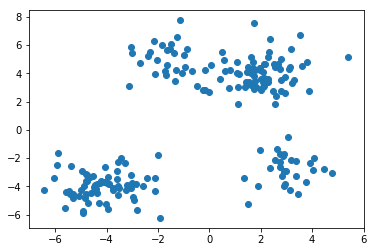

In [251]:
X = np.loadtxt('twodpoints.txt', delimiter=',')
plt.scatter(X[:,0], X[:,1])

Looking at the datapoints, 3 clusters would be suitable for this databpoints. 1 cluster located on the top, and 2 at the bottom of the graph. However, you can controversy argue that the 1 cluster located on the top side of the graph can be two distict clusters. One on the top left and the other other on the top right side of the graph. In that case we will end up with 4 clusters. Although, 4 clusters are plusable, the top clusters does not seem through visual inspection to have far enough centers for them to be distinct (relatively speaking).
Below are two plots for K-means algorithm using manually selected 3 and 4 clusters.

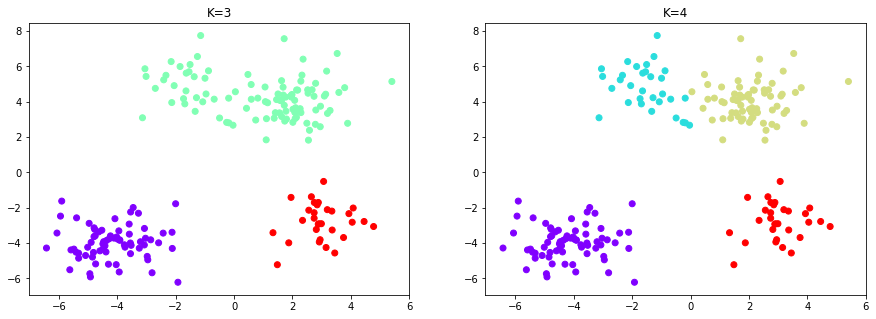

In [252]:
plt.figure(figsize=(15,5))
K=3
initial_centroids = np.array([[-4, -4], [0, 5], [3, -4]])
centroids, idx = Kmeans(X, initial_centroids)
plt.subplot(1, 2, 1)
plotdatapts(X, idx, K, "K=3")

K=4
initial_centroids = np.array([[-4, -4], [-2,5],[2, 5], [3, -4]])
centroids, idx = Kmeans(X, initial_centroids)
plt.subplot(1, 2, 2)
plotdatapts(X, idx, K, "K=4")

## Problem C

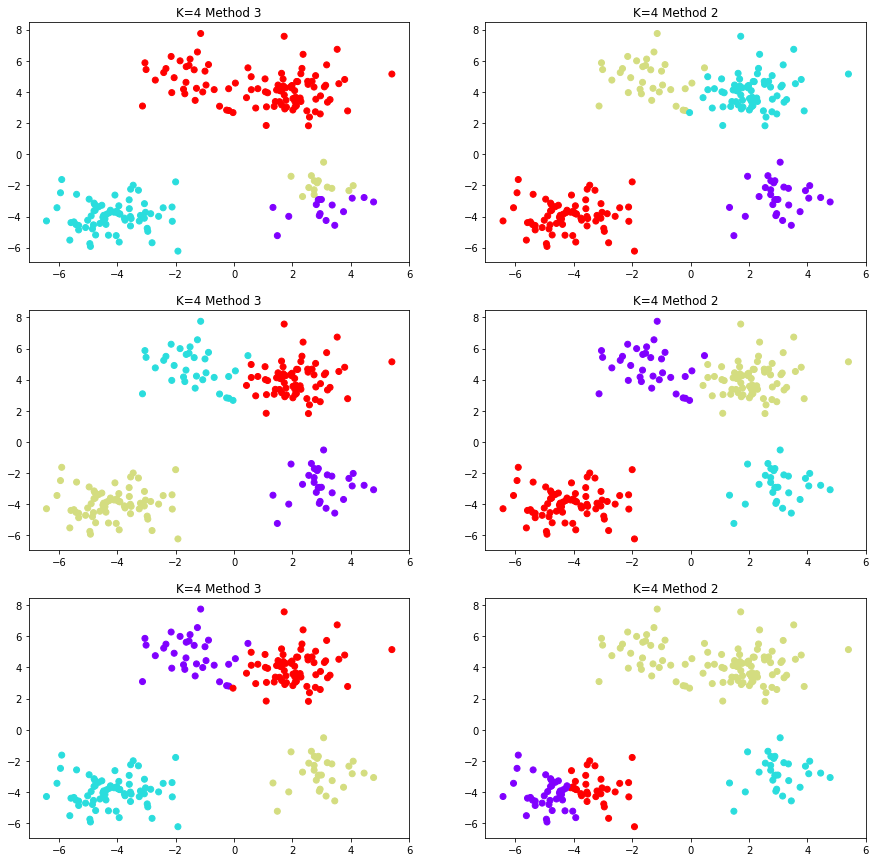

In [253]:
plt.figure(figsize=(15,15))
K=4
for i in range(1,7):
    if (i % 2) == 0:
        rand = np.random.randint(0,X.shape[0],K)
        initial_centroids = np.array([X[rand[0],:], X[rand[1],:],X[rand[2],:], X[rand[3],:]])
        centroids, idx = Kmeans(X, initial_centroids, 20)
        plt.subplot(3, 2, i)
        plotdatapts(X, idx, K, f"K={K} Method 2")
    else:
        initial_centroids =  np.random.uniform(min(X[:,0]),max(X[:,1]),(K,2))
        centroids, idx = Kmeans(X, initial_centroids,20)
        plt.subplot(3, 2, i)
        plotdatapts(X, idx, K, f"K={K} Method 3")

## Problem D

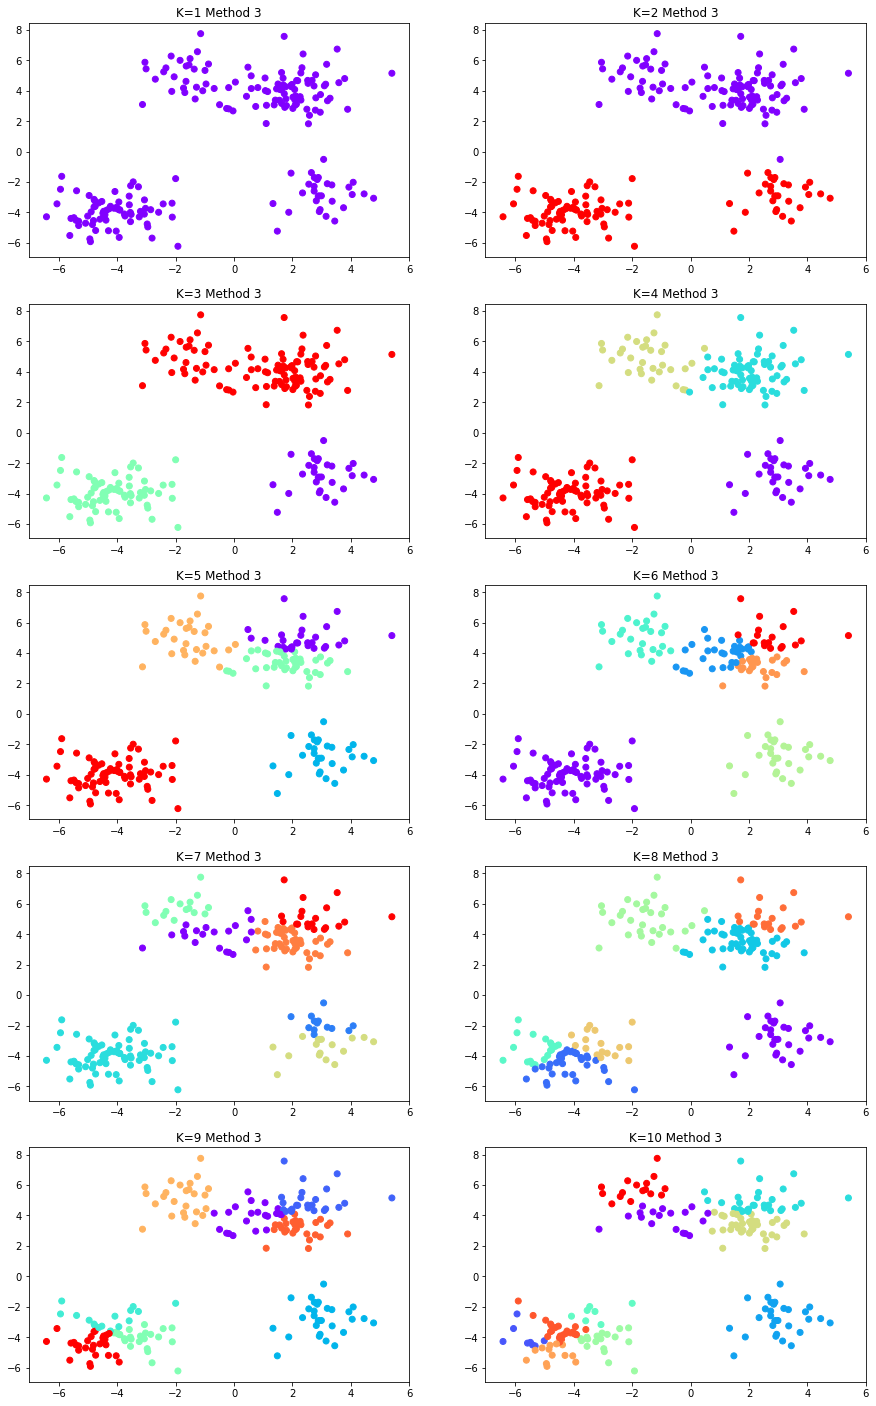

In [254]:
plt.figure(figsize=(15,25))
for i in range(1,11):
    initial_centroids =  np.random.uniform(X.min(),X.max(),(i,2))
    centroids, idx = Kmeans(X, initial_centroids,20)
    plt.subplot(5, 2, i)
    plotdatapts(X, idx, i, f"K={i} Method 3")

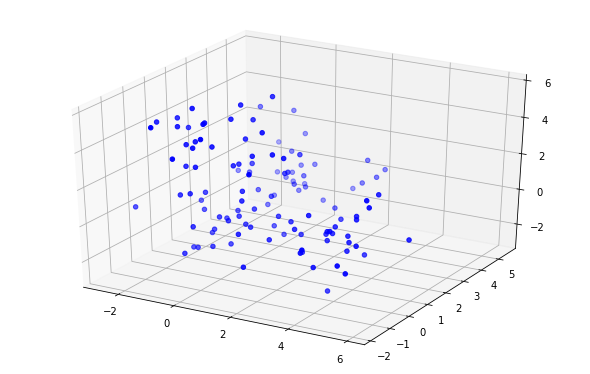

In [326]:
X = np.loadtxt('threedpoints.txt', delimiter=',')
fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c = 'b', marker = 'o')

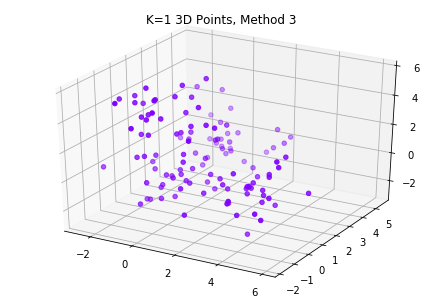

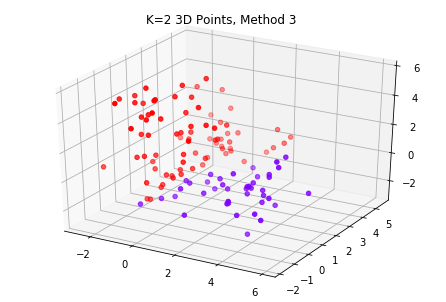

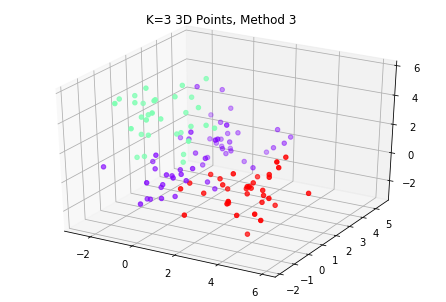

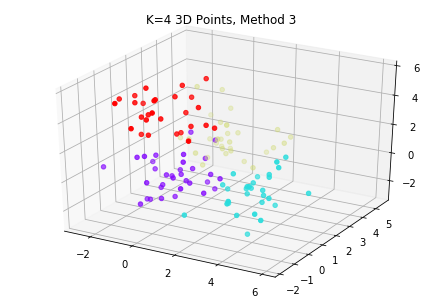

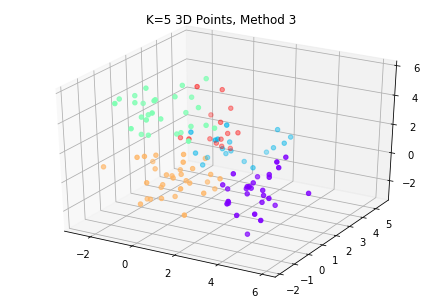

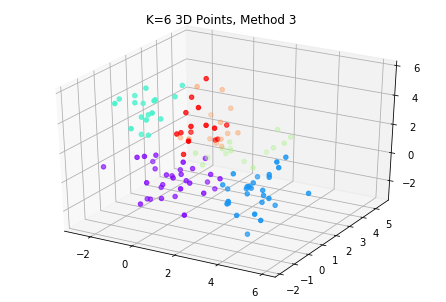

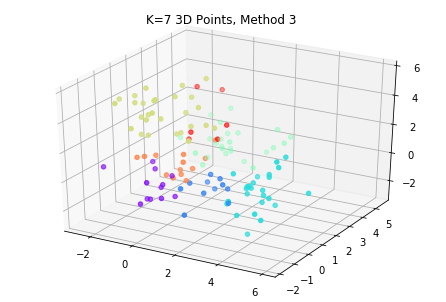

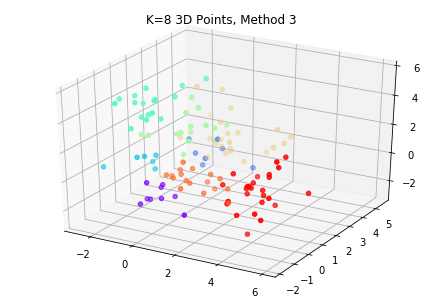

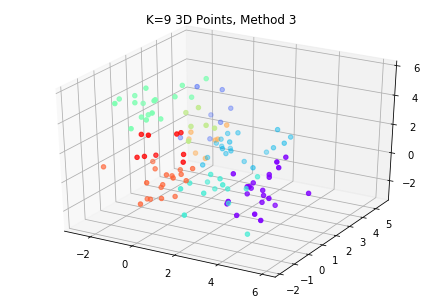

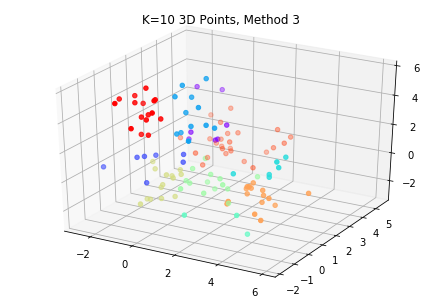

In [351]:
def plotdatapts3d(X,idx,K,i=None):
    fig = plt.figure(figsize=(6,4))
    ax = Axes3D(fig)
    if i != None:
        plt.title(i)
    color=cm.rainbow(np.linspace(0,1,K))
    ax.scatter(X[:,0],X[:,1],X[:,2],c=color[idx.astype(int),:], marker='o')

for i in range(1,11):
    initial_centroids =  np.random.uniform(X.min(),X.max(),(i,3))
    centroids, idx = Kmeans(X, initial_centroids,20)
    plotdatapts3d(X,idx, i, f"K={i} 3D Points, Method 3 ")

## Problem F

In [416]:
X = np.loadtxt('seeds_dataset.txt', delimiter='\t')
Y = X[:,X.shape[1]-1]
X = X[:,0:X.shape[1]-1]

for i in range(1,11):
    max_ = 0
    for j in range(1,100):
        initial_centroids =  np.random.uniform(X.min(),X.max(),(i,7))
        centroids, idx = Kmeans(X, initial_centroids,20)
        answer = np.average(Y == (idx+1))
        if answer > max_:
            max_ = answer
    print(f'K={i} -> {max_}')


K=1 -> 0.3333333333333333
K=2 -> 0.6095238095238096
K=3 -> 0.6619047619047619
K=4 -> 0.8904761904761904
K=5 -> 0.6523809523809524
K=6 -> 0.8904761904761904
K=7 -> 0.6619047619047619
K=8 -> 0.6095238095238096
K=9 -> 0.6190476190476191
K=10 -> 0.6619047619047619


## Problem G

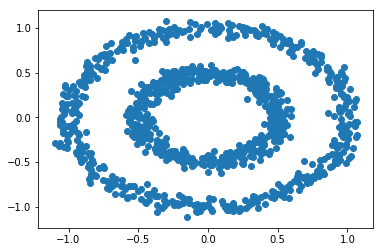

In [443]:
from sklearn.datasets import make_circles
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5)
plt.scatter(X[:,0],X[:,1])

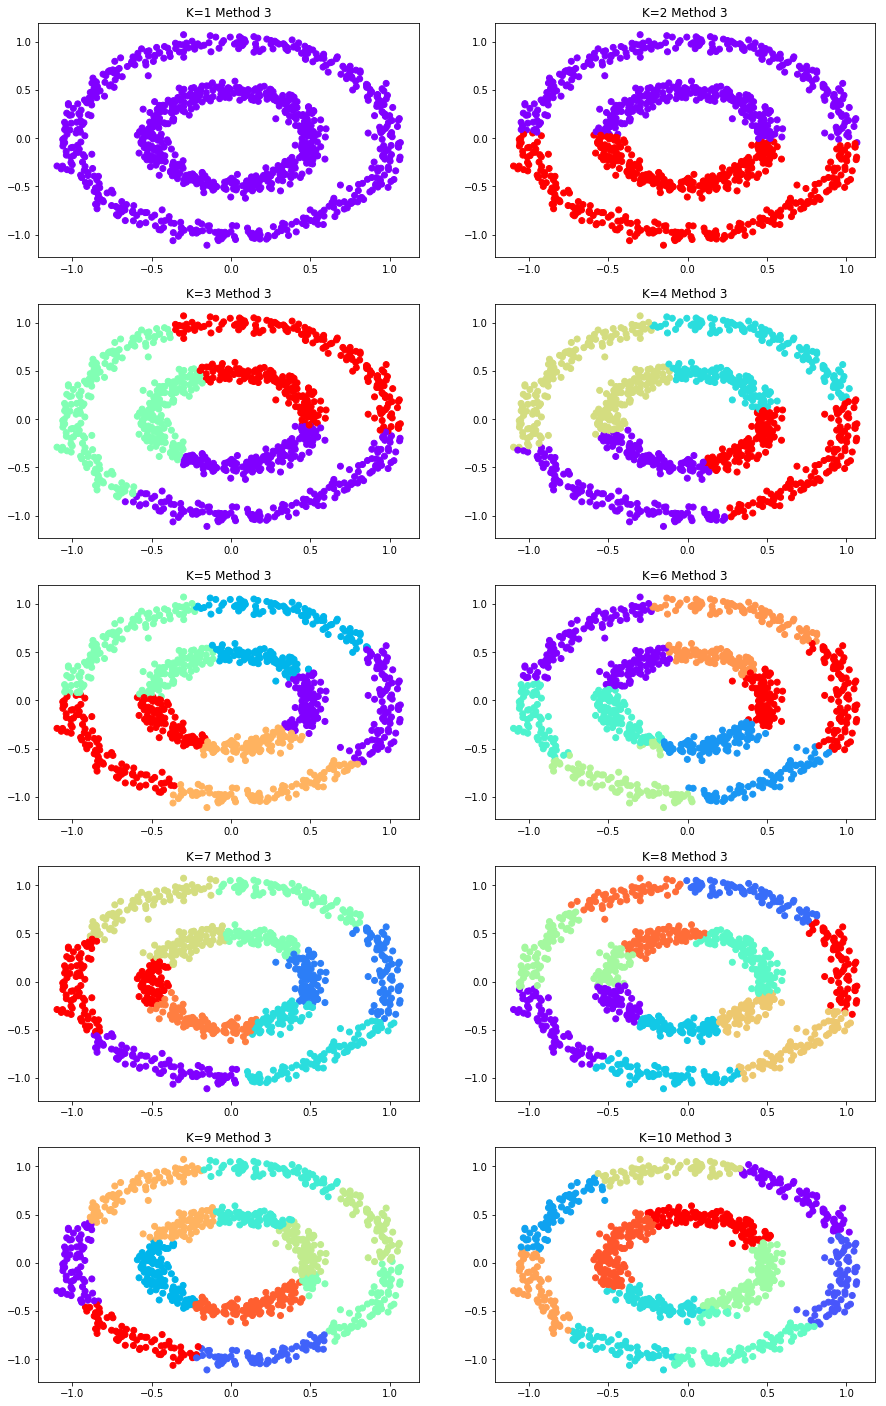

In [444]:
plt.figure(figsize=(15,25))
for i in range(1,11):
    initial_centroids =  np.random.uniform(X.min(),X.max(),(i,2))
    centroids, idx = Kmeans(X, initial_centroids,20)
    plt.subplot(5, 2, i)
    plotdatapts(X, idx, i, f"K={i} Method 3")